# Modelling

In [ ]:
def confusion_mat(test_y,predict_y):
    ''' Function to Visualize the Confusion Matrix'''

    labels = [0,1]
    plt.figure(figsize=(6,6))
    cmap=sns.light_palette("blue")
    C = confusion_matrix(test_y, predict_y)
    print("Percentage of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    sns.heatmap(C, cmap="Blues",annot=True,annot_kws={"size": 16},fmt='g')
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Confusion matrix')

    plt.show()

#Random Forest


F1 score for : 10 is 0.7591836734693876 
F1 score for : 50 is 0.753968253968254 
F1 score for : 100 is 0.7818930041152262 
F1 score for : 500 is 0.7736625514403292 
F1 score for : 1000 is 0.7741935483870969 
F1 score for : 2000 is 0.7804878048780488 

  Best alpha (hyperparameter) : 100 



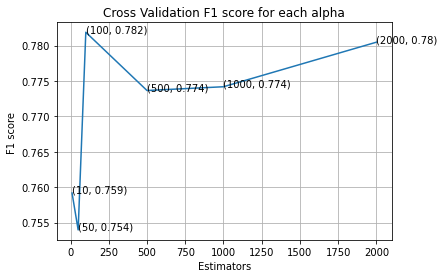


 Predicting F1 score for train,cv and test data with best hyperparameter 

F1 score for train data :  1.0
F1_score for cv data :  0.7755102040816326
F1_score for test data :  0.8112244897959185
****************************************************************************************************
Confusion Matrix for the Train Data  

Percentage of misclassified points  0.0


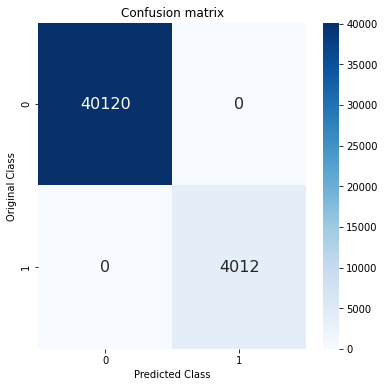

****************************************************************************************************
Confusion Matrix for the Test Data  

Percentage of misclassified points  0.6166666666666667


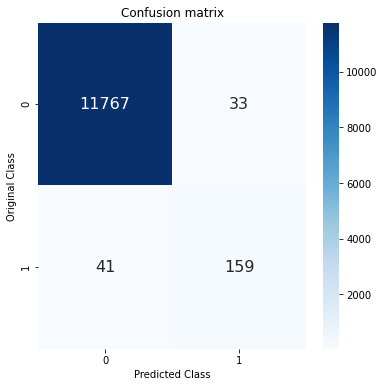

****************************************************************************************************


In [ ]:
#choosing the best hyperparameters

alpha=[10,50,100,500,1000,2000]

#storing the f1 score for all hyperparameters in an array
cv_f1score_array=[]
for i in tqdm(alpha):
    random_forest=RandomForestClassifier(n_estimators=i,n_jobs=-1)
    random_forest.fit(X_train,y_train)
    predict_y = random_forest.predict(X_cv)
    cv_f1score_array.append(f1_score(y_cv, predict_y,average='binary'))

#displaying the F1 score for all hyperparameters
for i in range(len(cv_f1score_array)):
    print ('F1 score for : {} is {} '.format(alpha[i],cv_f1score_array[i]))

#best hyperparameter
best_alpha = np.argmax(cv_f1score_array)

print( '\n  Best alpha (hyperparameter) :',alpha[best_alpha]  ,'\n')

#plotting the changes of the performance metric with best hyperparameter
fig, ax = plt.subplots()

#plotting hyperparameter V/S F1score  graph
ax.plot(alpha, cv_f1score_array)
for i, txt in enumerate(np.round(cv_f1score_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_f1score_array[i]))
plt.grid()
plt.title("Cross Validation F1 score for each alpha")
plt.xlabel("Estimators")
plt.ylabel("F1 score ")
plt.show()


#fitting the classifier with best hyperparameter
random_forest=RandomForestClassifier(n_estimators=alpha[best_alpha],n_jobs=-1)
random_forest.fit(X_train, y_train)

#predicting actual labels
pred_y=random_forest.predict(X_test)

#displaying the perfomance metric for train,cv and test data
print('\n Predicting F1 score for train,cv and test data with best hyperparameter \n')
pred_y_train = random_forest.predict(X_train)
print ('F1 score for train data : ',f1_score(y_train, pred_y_train,average='binary' ))
pred_y_cv = random_forest.predict(X_cv)
print ('F1_score for cv data : ',f1_score(y_cv, pred_y_cv, average='binary'))
pred_y_test = random_forest.predict(X_test)
print ('F1_score for test data : ',f1_score(y_test, pred_y_test, average='binary'))
print('*'*100)
print("Confusion Matrix for the Train Data ",'\n')
confusion_mat(y_train,pred_y_train)
print('*'*100)
print("Confusion Matrix for the Test Data ",'\n')
confusion_mat(y_test,pred_y_test)
print('*'*100)


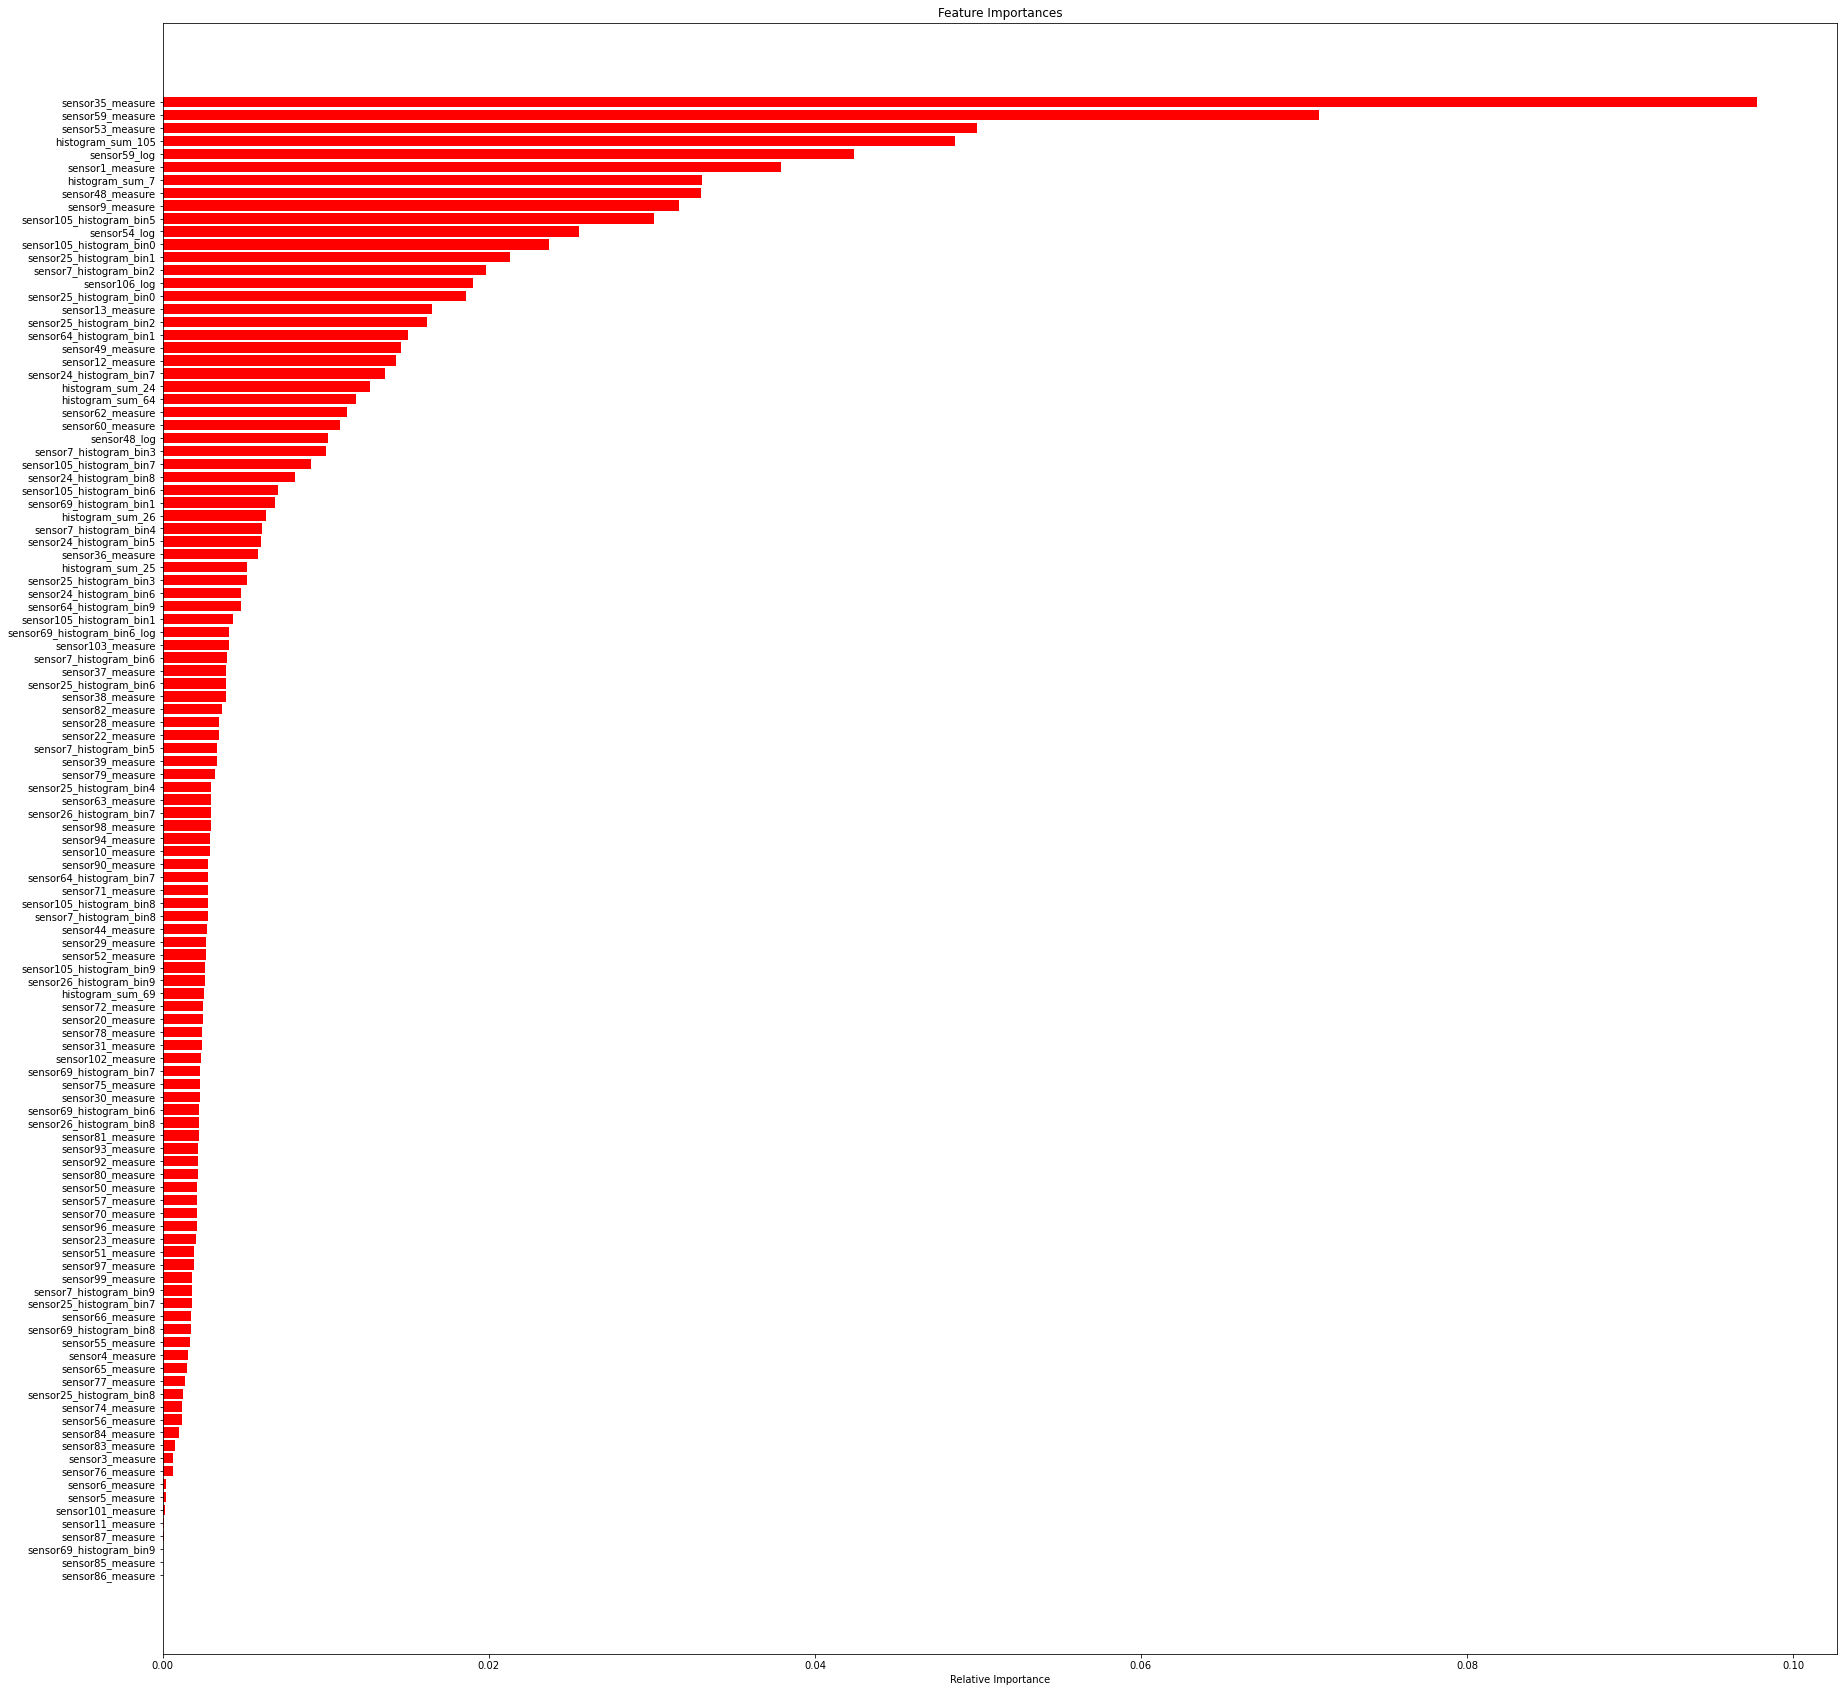

In [ ]:
features = X_train.columns
importances = random_forest.feature_importances_   #checking the importance of each feature towards the contribution of builiding this model
indices = (np.argsort(importances))
plt.figure(figsize=(30,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
features = X_train.columns
importances = random_forest.feature_importances_
indices = (np.argsort(importances))[:25]    #Most of the features have a significant importance and hence let us remove the least 25 important features
redundant=[]
for i in indices:
    redundant.append(features[i])

#removing the least important features.
X_tr_rf=X_train.drop(redundant,axis=1)
X_cv_rf=X_cv.drop(redundant,axis=1)
X_te_rf=X_test.drop(redundant,axis=1)

### Random Forest with important Features


F1 score for : 10 is 0.7190082644628099 
F1 score for : 50 is 0.761904761904762 
F1 score for : 100 is 0.7673469387755101 
F1 score for : 500 is 0.7773279352226721 
F1 score for : 1000 is 0.7710843373493975 
F1 score for : 2000 is 0.7804878048780488 

  Best alpha (hyperparameter) : 2000 



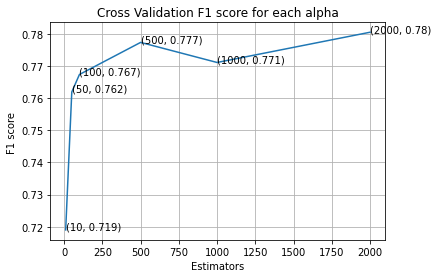


 Predicting F1 score for train,cv and test data with best hyperparameter 

F1 score for train data :  1.0
F1_score for cv data :  0.7741935483870969
F1_score for test data :  0.810126582278481
****************************************************************************************************
Confusion Matrix for the Train Data  

Percentage of misclassified points  0.0


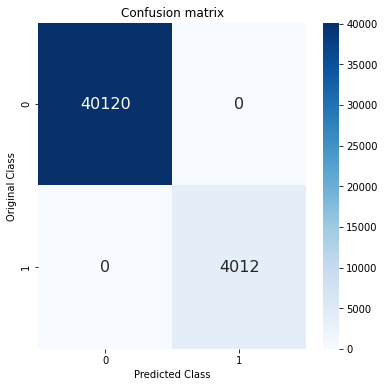

****************************************************************************************************
Confusion Matrix for the Test Data  

Percentage of misclassified points  0.625


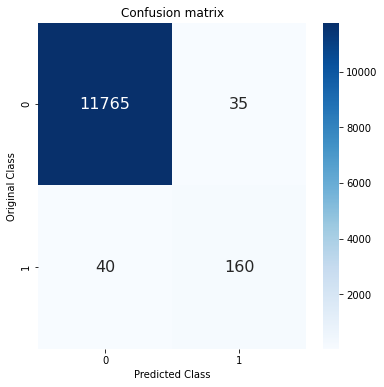

****************************************************************************************************


In [ ]:
#choosing the best hyperparameters

alpha=[10,50,100,500,1000,2000]

#storing the f1 score for all hyperparameters in an array
cv_f1score_array=[]
for i in tqdm(alpha):
    random_forest=RandomForestClassifier(n_estimators=i,n_jobs=-1)
    random_forest.fit(X_tr_rf,y_train)
    predict_y = random_forest.predict(X_cv_rf)
    cv_f1score_array.append(f1_score(y_cv, predict_y,average='binary'))

#displaying the F1 score for all hyperparameters
for i in range(len(cv_f1score_array)):
    print ('F1 score for : {} is {} '.format(alpha[i],cv_f1score_array[i]))

#best hyperparameter
best_alpha = np.argmax(cv_f1score_array)

print( '\n  Best alpha (hyperparameter) :',alpha[best_alpha]  ,'\n')

#plotting the changes of the performance metric with best hyperparameter
fig, ax = plt.subplots()

#plotting hyperparameter V/S F1score  graph
ax.plot(alpha, cv_f1score_array)
for i, txt in enumerate(np.round(cv_f1score_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_f1score_array[i]))
plt.grid()
plt.title("Cross Validation F1 score for each alpha")
plt.xlabel("Estimators")
plt.ylabel("F1 score ")
plt.show()


#fitting the classifier with best hyperparameter
random_forest=RandomForestClassifier(n_estimators=alpha[best_alpha],n_jobs=-1)
random_forest.fit(X_tr_rf, y_train)

#predicting actual labels
pred_y=random_forest.predict(X_te_rf)

#displaying the perfomance metric for train,cv and test data
print('\n Predicting F1 score for train,cv and test data with best hyperparameter \n')
pred_y_train = random_forest.predict(X_tr_rf)
print ('F1 score for train data : ',f1_score(y_train, pred_y_train,average='binary' ))
pred_y_cv = random_forest.predict(X_cv_rf)
print ('F1_score for cv data : ',f1_score(y_cv, pred_y_cv, average='binary'))
pred_y_test = random_forest.predict(X_te_rf)
print ('F1_score for test data : ',f1_score(y_test, pred_y_test, average='binary'))
print('*'*100)
print("Confusion Matrix for the Train Data ",'\n')
confusion_mat(y_train,pred_y_train)
print('*'*100)
print("Confusion Matrix for the Test Data ",'\n')
confusion_mat(y_test,pred_y_test)
print('*'*100)